In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('book_train12.csv')
np.random.seed(123)
target = df.is_canceled
df = df.drop(columns=['seq','is_canceled'])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.3,
                                                   stratify=target)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83574 entries, 0 to 83573
Columns: 247 entries, lead_time to lead_time_month
dtypes: float64(2), int64(245)
memory usage: 157.5 MB


# XGBoost

In [4]:
# !pip install xgboost

In [5]:
import xgboost as XGB
from xgboost import XGBClassifier

In [6]:
xgb = XGBClassifier(n_estimators=1000, objective='binary:logistic',
                    learning_rate=0.05, max_depth=15)
evals = [(x_test, y_test)]

In [7]:
xgb.fit(x_train, y_train, eval_metric='auc', eval_set=evals,
        early_stopping_rounds=100, verbose=True)

[0]	validation_0-auc:0.92672
Will train until validation_0-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.93076
[2]	validation_0-auc:0.93175
[3]	validation_0-auc:0.93249
[4]	validation_0-auc:0.93310
[5]	validation_0-auc:0.93343
[6]	validation_0-auc:0.93412
[7]	validation_0-auc:0.93434
[8]	validation_0-auc:0.93486
[9]	validation_0-auc:0.93493
[10]	validation_0-auc:0.93552
[11]	validation_0-auc:0.93561
[12]	validation_0-auc:0.93579
[13]	validation_0-auc:0.93639
[14]	validation_0-auc:0.93702
[15]	validation_0-auc:0.93765
[16]	validation_0-auc:0.93815
[17]	validation_0-auc:0.93857
[18]	validation_0-auc:0.93881
[19]	validation_0-auc:0.93917
[20]	validation_0-auc:0.93939
[21]	validation_0-auc:0.93965
[22]	validation_0-auc:0.93980
[23]	validation_0-auc:0.94001
[24]	validation_0-auc:0.94008
[25]	validation_0-auc:0.94026
[26]	validation_0-auc:0.94034
[27]	validation_0-auc:0.94047
[28]	validation_0-auc:0.94068
[29]	validation_0-auc:0.94085
[30]	validation_0-auc:0.94100
[31]	validation

[266]	validation_0-auc:0.95091
[267]	validation_0-auc:0.95091
[268]	validation_0-auc:0.95091
[269]	validation_0-auc:0.95092
[270]	validation_0-auc:0.95093
[271]	validation_0-auc:0.95093
[272]	validation_0-auc:0.95093
[273]	validation_0-auc:0.95092
[274]	validation_0-auc:0.95093
[275]	validation_0-auc:0.95093
[276]	validation_0-auc:0.95094
[277]	validation_0-auc:0.95094
[278]	validation_0-auc:0.95095
[279]	validation_0-auc:0.95095
[280]	validation_0-auc:0.95100
[281]	validation_0-auc:0.95100
[282]	validation_0-auc:0.95101
[283]	validation_0-auc:0.95103
[284]	validation_0-auc:0.95104
[285]	validation_0-auc:0.95102
[286]	validation_0-auc:0.95104
[287]	validation_0-auc:0.95105
[288]	validation_0-auc:0.95105
[289]	validation_0-auc:0.95105
[290]	validation_0-auc:0.95106
[291]	validation_0-auc:0.95108
[292]	validation_0-auc:0.95108
[293]	validation_0-auc:0.95110
[294]	validation_0-auc:0.95114
[295]	validation_0-auc:0.95116
[296]	validation_0-auc:0.95117
[297]	validation_0-auc:0.95119
[298]	va

[531]	validation_0-auc:0.95192
[532]	validation_0-auc:0.95192
[533]	validation_0-auc:0.95193
[534]	validation_0-auc:0.95196
[535]	validation_0-auc:0.95195
[536]	validation_0-auc:0.95195
[537]	validation_0-auc:0.95195
[538]	validation_0-auc:0.95195
[539]	validation_0-auc:0.95195
[540]	validation_0-auc:0.95195
[541]	validation_0-auc:0.95195
[542]	validation_0-auc:0.95193
[543]	validation_0-auc:0.95193
[544]	validation_0-auc:0.95193
[545]	validation_0-auc:0.95192
[546]	validation_0-auc:0.95192
[547]	validation_0-auc:0.95191
[548]	validation_0-auc:0.95191
[549]	validation_0-auc:0.95191
[550]	validation_0-auc:0.95191
[551]	validation_0-auc:0.95190
[552]	validation_0-auc:0.95190
[553]	validation_0-auc:0.95192
[554]	validation_0-auc:0.95193
[555]	validation_0-auc:0.95190
[556]	validation_0-auc:0.95190
[557]	validation_0-auc:0.95190
[558]	validation_0-auc:0.95187
[559]	validation_0-auc:0.95187
[560]	validation_0-auc:0.95186
[561]	validation_0-auc:0.95184
[562]	validation_0-auc:0.95183
[563]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
pred = xgb.predict_proba(x_test)[:,1]
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred)

0.9520895277111139

In [9]:
test_set_xgb = pd.read_csv('book_test12.csv')
test_set_xgb

,seq,lead_time,year,week_number,day,stays_in_weekend,stays_in_week,adults,child,baby,...,assigned_room_type_L,assigned_room_type_P,deposit_No Deposit,deposit_Non Refund,deposit_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,lead_time_month
0,B080253,160,2015,53,30,0,3,2,0.0,0,...,0,0,1,0,0,0,0,0,1,5.333333
1,B085982,307,2015,34,20,0,2,2,0.0,0,...,0,0,0,1,0,1,0,0,0,10.233333
2,B102787,301,2015,33,14,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,1,10.033333
3,B066542,48,2015,36,1,0,3,2,0.0,0,...,0,0,1,0,0,0,0,1,0,1.600000
4,B074185,32,2015,47,20,0,2,1,0.0,0,...,0,0,1,0,0,0,0,0,1,1.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35811,B073964,72,2017,21,23,0,2,2,0.0,0,...,0,0,1,0,0,0,0,0,1,2.400000
35812,B038832,414,2017,28,13,0,2,2,0.0,0,...,0,0,1,0,0,0,0,0,1,13.800000
35813,B040589,196,2017,19,13,2,2,2,0.0,0,...,0,0,1,0,0,0,0,1,0,6.533333
35814,B043447,137,2017,10,6,1,1,2,0.0,0,...,0,0,1,0,0,0,0,0,1,4.566667


In [10]:
pred = xgb.predict_proba(x_test)[:,1]
roc_auc_score(y_test,pred)

0.9520895277111139

In [11]:
pred_xgb = xgb.predict_proba(test_set_xgb.drop(columns='seq'))
pred_xgb

array([[8.23293924e-02, 9.17670608e-01],
       [3.69548798e-06, 9.99996305e-01],
       [1.41859055e-05, 9.99985814e-01],
       ...,
       [2.74791300e-01, 7.25208700e-01],
       [9.99644816e-01, 3.55193362e-04],
       [8.30717683e-01, 1.69282287e-01]], dtype=float32)

In [12]:
submit_xgb = pd.DataFrame({'seq':test_set_xgb.seq, 'is_canceled':pred_xgb[:,1]})
submit_xgb = submit_xgb.set_index('seq')

In [13]:
submit_xgb

,is_canceled
seq,
B080253,0.917671
B085982,0.999996
B102787,0.999986
B066542,0.000745
B074185,0.999149
...,...
B073964,0.008845
B038832,0.000217
B040589,0.725209


In [14]:
submit_xgb.to_csv('my_pred_xgb_new_ppp4.csv')

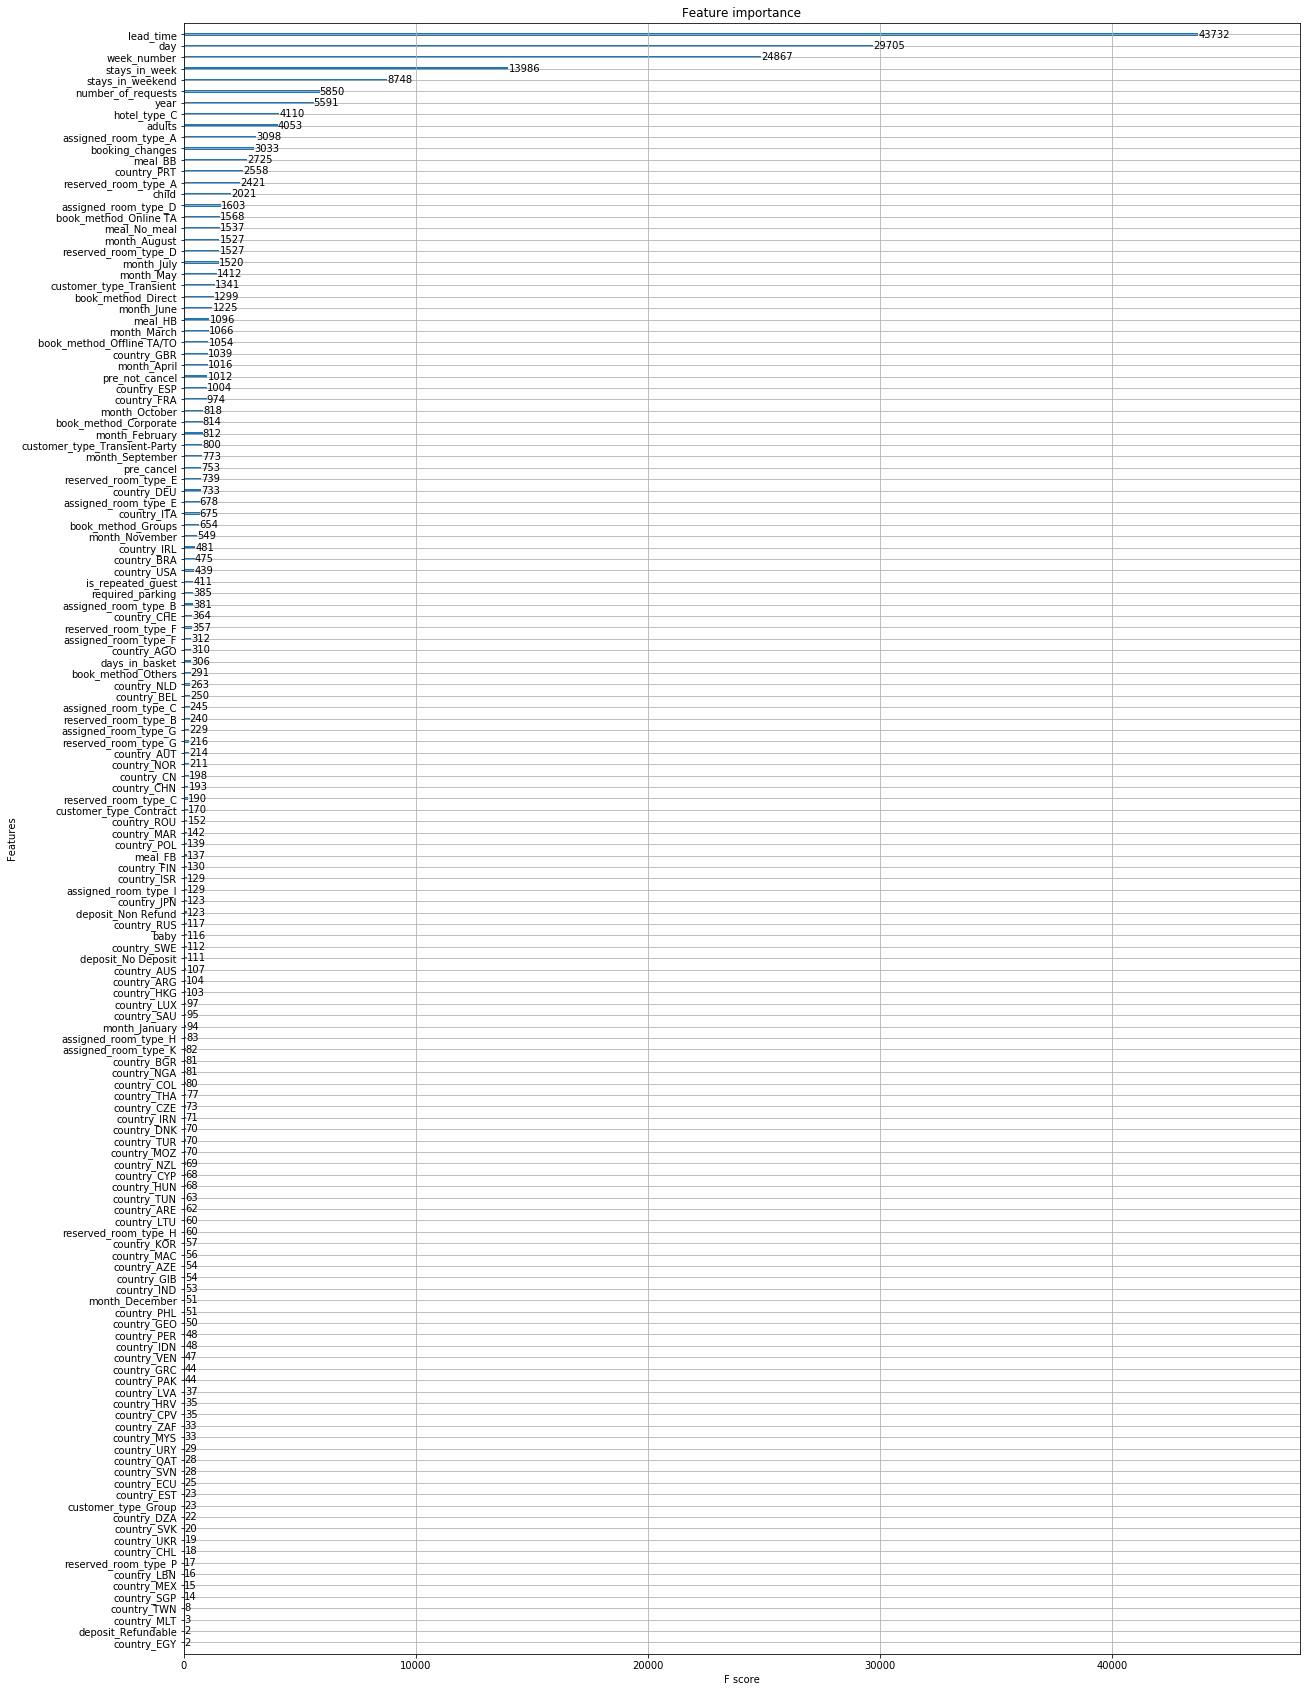

In [15]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(20,30))
plot_importance(xgb, ax=ax);